In [12]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.4 MB/s eta 0:00:00


In [19]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, Naive
import pandas as pd

path = 'https://raw.githubusercontent.com/cleyson02/Time-Series/main/BeerWineLiquor.csv'

dados = pd.read_csv(path)

# Converter a coluna 'date' para tipo datetime
dados['date'] = pd.to_datetime(dados['date'])

In [16]:
dados

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [25]:
df_nixtla = pd.DataFrame(
    {
        'ds' : dados.date,
        'y' : dados.beer

    }
    )
df_nixtla

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


In [26]:
df_nixtla['unique_id'] = 'cerveja'

df_nixtla

,ds,y,unique_id
0,1992-01-01,1509,cerveja
1,1992-02-01,1541,cerveja
2,1992-03-01,1597,cerveja
3,1992-04-01,1675,cerveja
4,1992-05-01,1822,cerveja
...,...,...,...
319,2018-08-01,4898,cerveja
320,2018-09-01,4598,cerveja
321,2018-10-01,4737,cerveja
322,2018-11-01,5130,cerveja


In [31]:
df_test = df_nixtla.groupby('unique_id').tail(24)
df_train = df_nixtla.drop(df_test.index)

In [32]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12), Naive()], # Série mensal, ciclo de 12 meses
    freq = 'M'
)

In [33]:
sf.fit(df_train)

StatsForecast(models=[AutoARIMA,Naive])

In [35]:
predict = sf.predict(24)
predict

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,Naive
unique_id,,,
cerveja,2016-12-31,3907.687256,6054.0
cerveja,2017-01-31,4081.154785,6054.0
cerveja,2017-02-28,4330.904297,6054.0
cerveja,2017-03-31,4408.991211,6054.0
cerveja,2017-04-30,4707.777832,6054.0
cerveja,2017-05-31,4750.205566,6054.0
cerveja,2017-06-30,4999.060547,6054.0
cerveja,2017-07-31,4789.186523,6054.0
cerveja,2017-08-31,4669.130371,6054.0


In [36]:
import matplotlib.pyplot as plt

In [40]:
predict = predict.reset_index()

predict

,level_0,index,unique_id,ds,AutoARIMA,Naive
0,0,0,cerveja,2016-12-31,3907.687256,6054.0
1,1,1,cerveja,2017-01-31,4081.154785,6054.0
2,2,2,cerveja,2017-02-28,4330.904297,6054.0
3,3,3,cerveja,2017-03-31,4408.991211,6054.0
4,4,4,cerveja,2017-04-30,4707.777832,6054.0
5,5,5,cerveja,2017-05-31,4750.205566,6054.0
6,6,6,cerveja,2017-06-30,4999.060547,6054.0
7,7,7,cerveja,2017-07-31,4789.186523,6054.0
8,8,8,cerveja,2017-08-31,4669.130371,6054.0
9,9,9,cerveja,2017-09-30,4717.996094,6054.0


In [41]:
series = []
for unique_id in predict['unique_id'].unique():
  serie = predict.query("unique_id == @unique_id ")[['AutoARIMA', 'Naive']]
  series.append(serie)

In [42]:
df_test['y']

300    3728
301    3759
302    4247
303    4251
304    4647
305    4676
306    4798
307    4647
308    4538
309    4536
310    4846
311    6241
312    3965
313    3967
314    4629
315    4317
316    4897
317    4939
318    4963
319    4898
320    4598
321    4737
322    5130
323    6370
Name: y, dtype: int64

In [43]:
df_result = series[0]
df_result['target'] = df_test['y'].values[0:24]

<Axes: >

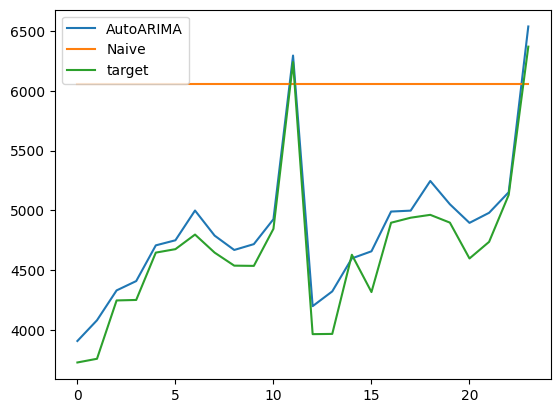

In [44]:
df_result.plot()

In [45]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [46]:
MAPE(df_result['target'], df_result['AutoARIMA'])

0.03697360987526444

In [47]:
MAPE(df_result['target'], df_result['Naive'])

0.32081202229040057